In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/shruti-sureshan/Datasets/main/haberman.csv")
df.columns = ['Age','Op_Year','Axial_nodes','Surv_status']

In [ ]:
df.head()

,Age,Op_Year,Axial_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
print (df.shape)

(305, 4)


We hav 304 datapoints and 4 features

In [ ]:
print (df.columns) #column names

Index(['Age', 'Op_Year', 'Axial_nodes', 'Surv_status'], dtype='object')


In [ ]:
df["Surv_status"].value_counts() #datapoints per class

1    224
2     81
Name: Surv_status, dtype: int64

Class 1 contains 224 datapoints and Class 2 contains 81 datapoints

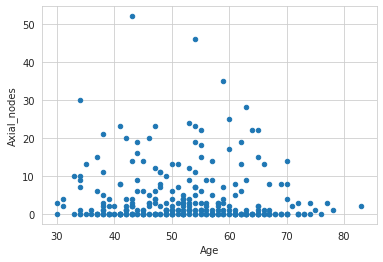

In [ ]:
#scatter plot
df.plot(kind='scatter', x='Age', y='Axial_nodes') ;
plt.show()

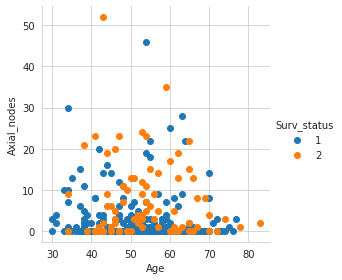

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Surv_status", size=4) \
   .map(plt.scatter, "Age", "Axial_nodes") \
   .add_legend();
plt.show();

In [ ]:
#3d scatter plot
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Op_Year', z='Axial_nodes',
              color='Surv_status')
fig.show()

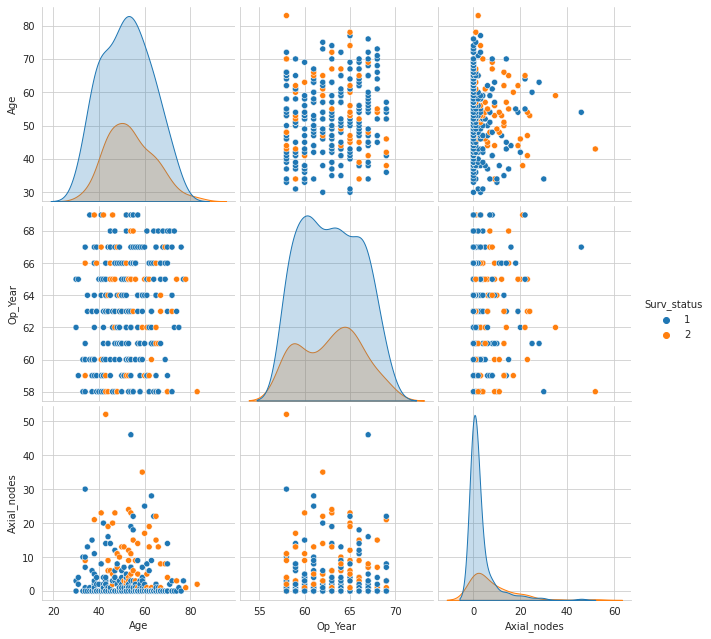

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Surv_status",palette="tab10", size=3);
plt.show()

**Conclusion:**
1. Age and Op_Year doesn't really help much in seperating the two classes as the PDF's are overlapping each other.
2. We can see the scatter plot between axil_nodes and Age seems to classify the two classes, its not perfect but will do.

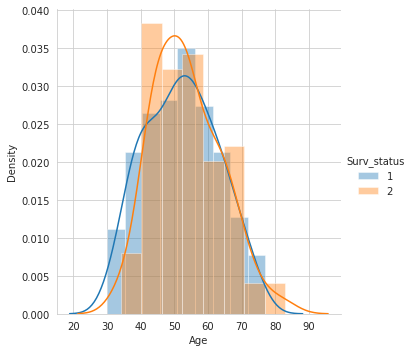

In [ ]:
sns.FacetGrid(df, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

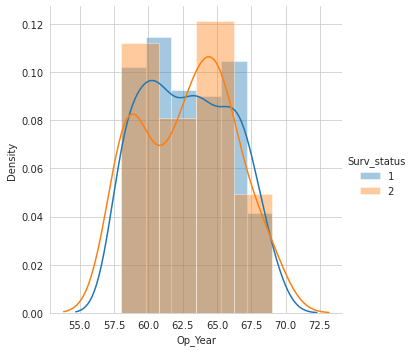

In [ ]:
sns.FacetGrid(df, hue="Surv_status", size=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.show();

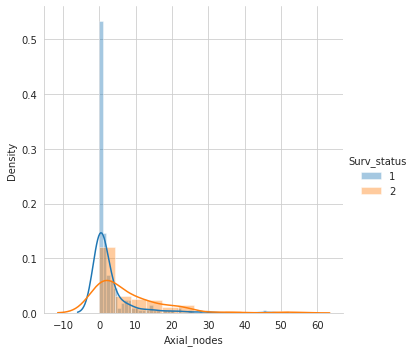

In [ ]:
sns.FacetGrid(df, hue="Surv_status", size=5) \
   .map(sns.distplot, "Axial_nodes") \
   .add_legend();
plt.show();

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


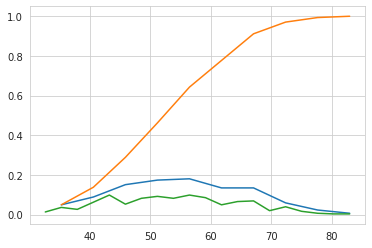

In [ ]:
counts, bin_edges = np.histogram(df['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df['Age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


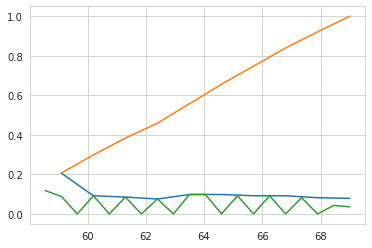

In [ ]:
counts, bin_edges = np.histogram(df['Op_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df['Op_Year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


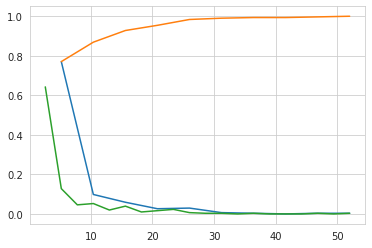

In [ ]:
counts, bin_edges = np.histogram(df['Axial_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df['Axial_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


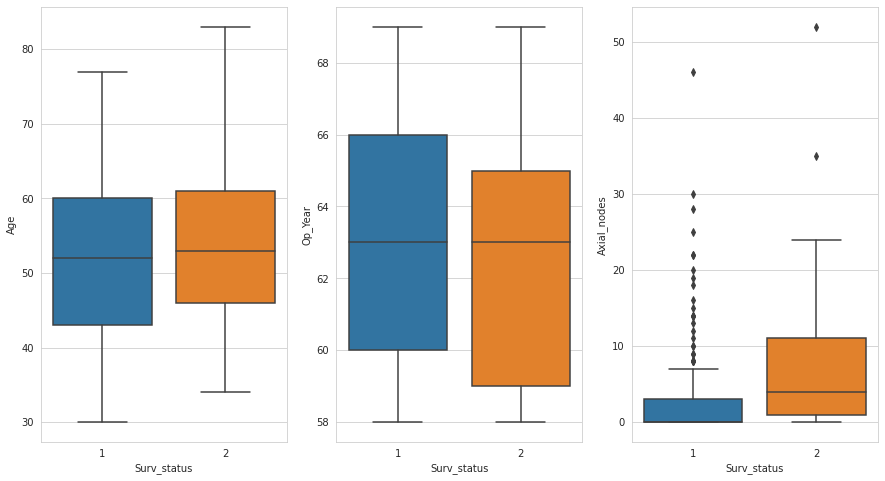

In [ ]:
#Box plot
f, axes = plt.subplots(1, 3,figsize=(15,8))
for i in range(3):
  sns.boxplot(y=df.columns[i], x=df.columns[-1] , data=df,  orient='v' , ax=axes[i]) 
plt.show()

**Conclusion:**
From the Boxplot also, it is clear that axial nodes provides a better classification of Survival than the other two features,as the IQR for other features are coinciding.

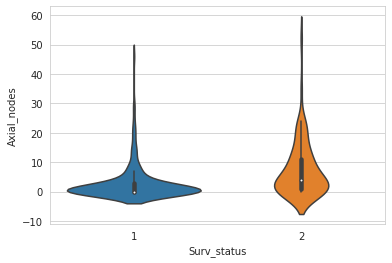

In [ ]:
sns.violinplot(x='Surv_status',y='Axial_nodes',data=df)
plt.show()

**Conclusion:**
We can see that the spread of Survived Patients ranges from 0~10 (having maximum intensity at nearly 3) that means the Chances of survival of Patient are highest when Axial nodes count is <= 3